##### Problem statement:
    
Convolutional neural network (CNN) (Any One from the following)
1) Use any dataset of plant disease and design a plant disease detection system using CNN.
2) Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


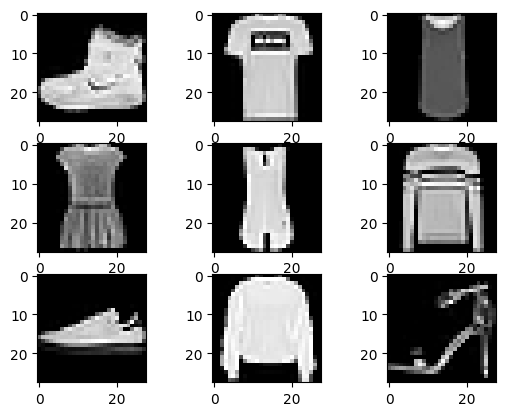

In [3]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist

#load dataset
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#summarize loaded dataset
print("Train: X=%s, Y=%s" % (x_train.shape, y_train.shape))
print("Test: X=%s, Y=%s" % (x_test.shape, y_test.shape))

# plot 1st few images
for i in range(9):
    pyplot.subplot(330+1+i)
    
    #plot raw pixel data
    
    pyplot.imshow(x_train[i],cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [4]:
#reshape dataset to have a single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
#convert from intgers to float #Nor . 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
#convert to one hot encoder (vector)
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2244 - accuracy: 0.9167 - val_loss: 0.2538 - val_accuracy: 0.9089
Epoch 2/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2172 - accuracy: 0.9172 - val_loss: 0.2594 - val_accuracy: 0.9042
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2114 - accuracy: 0.9201 - val_loss: 0.2565 - val_accuracy: 0.9089
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2051 - accuracy: 0.9218 - val_loss: 0.2518 - val_accuracy: 0.9124
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2029 - accuracy: 0.9233 - val_loss: 0.2457 - val_accuracy: 0.9146
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2018 - accuracy: 0.9225 - val_loss: 0.2648 - val_accuracy: 0.9039
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1997 - accuracy: 0.9245 - val_loss: 0.2556 -

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.2518 - accuracy: 0.9091
Test accuracy: 0.9090999960899353
Test loss: 0.25180888175964355


In [11]:
#single value  prediction in number (category)
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[1])))

313/313 [==============================] - 2s 6ms/step
2


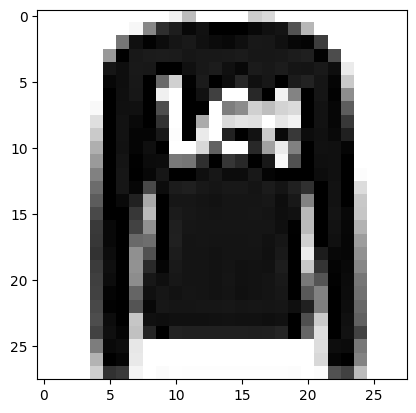

In [12]:
#single value predicition in graph (plot)
plt.imshow(x_test[1].reshape(28,28), cmap = plt.cm.binary)
plt.show()